# Exploratory data analysis:

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
df = pd.read_excel(r'Data_Train.xlsx')

### Data Pre-Processing:



In [149]:
df.columns=['name','location','year','kms','fuel','transmission','owner','mileage','engine','power','seats','price']

In [150]:
df.shape

(6019, 12)

In [151]:
cities=pd.Series(df.location.unique())
cities

0         Mumbai
1           Pune
2        Chennai
3     Coimbatore
4      Hyderabad
5         Jaipur
6          Kochi
7        Kolkata
8          Delhi
9      Bangalore
10     Ahmedabad
dtype: object

In [152]:
year=df.year.nunique()
year

22

In [153]:
fuel_type=pd.Series(df.fuel.unique())
fuel_type

0         CNG
1      Diesel
2      Petrol
3         LPG
4    Electric
dtype: object

In [154]:
owner=pd.Series(df.owner.unique())
owner

0             First
1            Second
2    Fourth & Above
3             Third
dtype: object

In [155]:
trans=pd.Series(df.transmission.unique())
trans

0       Manual
1    Automatic
dtype: object

## Data Types:

In [156]:
df.dtypes

name             object
location         object
year              int64
kms               int64
fuel             object
transmission     object
owner            object
mileage          object
engine           object
power            object
seats           float64
price           float64
dtype: object

'Mileage', 'Engine', 'Power' are certain labels that must be converted to numeric data type like for int or float for better predictions. Thus, we convert them into float data type.

## Handling of missing values:

In [157]:
df.isnull().sum()

name             0
location         0
year             0
kms              0
fuel             0
transmission     0
owner            0
mileage          2
engine          36
power           36
seats           42
price            0
dtype: int64

In [158]:
df.loc[df['mileage'].isnull()]

,name,location,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [159]:
a=df.loc[df['mileage'].isnull(),'name']
flag=0
for i in a:
    if(i in df.name.duplicated(keep=False)):
        print(i)
    else:
        flag=1
if(flag==1):
        print('No match found')
    

No match found


In [160]:
a=df.loc[df['engine'].isnull(),'name']
flag=0
for i in a:
    if(i in df.name.duplicated(keep=False)):
        print(i)
    else:
        flag=1
if(flag==1):
        print('No match found')
    

No match found


In [161]:
a=df.loc[df['power'].isnull(),'name']
flag=0
for i in a:
    if(i in df.name.duplicated(keep=False)):
        print(i)
    else:
        flag=1
if(flag==1):
        print('No match found')
    

No match found


In [162]:
a=df.loc[df['seats'].isnull(),'name']
flag=0
for i in a:
    if(i in df.name.duplicated(keep=False)):
        print(i)
    else:
        flag=1
if(flag==1):
        print('No match found')
    

No match found


**Since no car is there with the same model, it is quite difficult to find the values for the missing spaces. So, those rows with Nan values are dropped except horsepower. Though it is difficult to calculate the horsepower using engine, an approximate solution:<br>
1 bhp= 1.014 hp<br>
17 cc= 1hp<br>
Since we have the CC(engine) values:<br>
hp=n * 17 * 1.014 bhp**



In [163]:
df.dropna(subset=['mileage','engine','seats'],how='any',inplace=True)
df.shape


(5975, 12)

In [164]:
df.loc[(df.mileage.str.strip().str.contains('km/kg')),'mileage']=df.loc[(df.mileage.str.strip().str.contains('km/kg')),'mileage'].str.strip('km/kg')
df.loc[(df.mileage.str.strip().str.contains('kmpl')),'mileage']=df.loc[(df.mileage.str.strip().str.contains('kmpl')),'mileage'].str.strip('kmpl')
df.mileage=df.mileage.astype(float)
df.loc[(df.engine.str.strip().str.contains('CC')),'engine']=df.loc[(df.engine.str.strip().str.contains('CC')),'engine'].str.strip('CC')
df.engine=df.engine.astype(float)

In [165]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [166]:
df.loc[df.power.isnull() ,'power']=df.loc[df.power.isnull(),'engine']*17*1.014
df.loc[(df.power.str.strip().str.contains('bhp')),'power']=df.loc[(df.power.str.strip().str.contains('bhp')),'power'].str.strip('bhp')
df.loc[df.power.str.strip()=='null' ,'power']=df.loc[df.power.str.strip()=='null','engine']*17*1.014
df.loc[df.power=='0' ,'power']=df.loc[df.power=='0','engine']*17*1.014
df.power=df.power.astype(float)


## Handling redundant data:

In [167]:
df.duplicated().sum()

0

**The data doesn't have duplicated values.**

**Handling outliers:**

In [168]:
df.describe()

,year,kms,mileage,engine,power,seats,price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,523.080127,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,3305.554330,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,140.000000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,59229.768000,10.000000,160.000000


**Here, the minimum of the no. of seats of a car is given zero, which obviously is incorrect.**


In [169]:
df.loc[df.seats<4,'seats']=4

In [170]:
df.loc[df.power==df.power.max()]


,name,location,year,kms,fuel,transmission,owner,mileage,engine,power,seats,price
921,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,59229.768,4.0,40.0
2292,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,59229.768,4.0,43.0


## Graphical Analysis:

**First, analysis of how each column affects the final price**

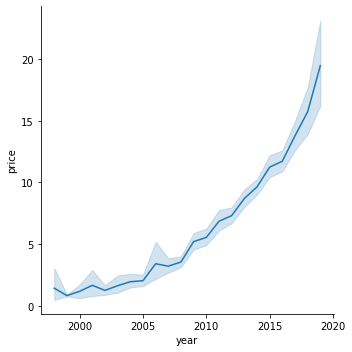

In [171]:
 sns.relplot(x="year", y="price", kind="line", data=df)


**Though the curve is not perfectly linear, it can be seen that when the car is new (bought in recent years), it has higher market value.**<br><br>

In [172]:
df.location.value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: location, dtype: int64

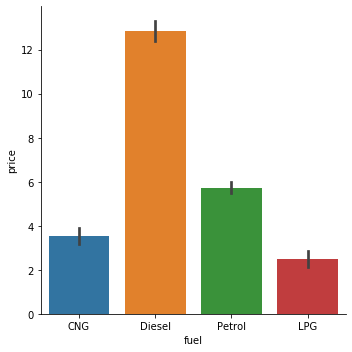

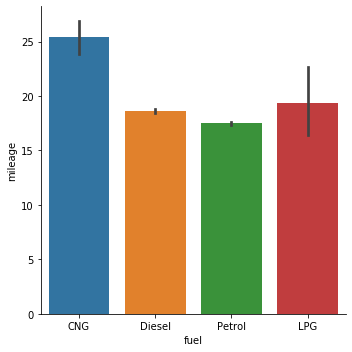

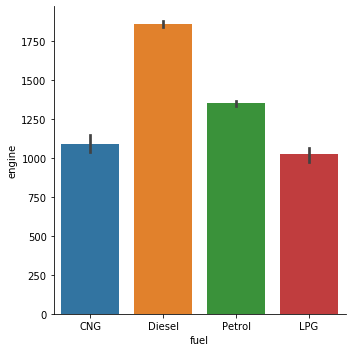

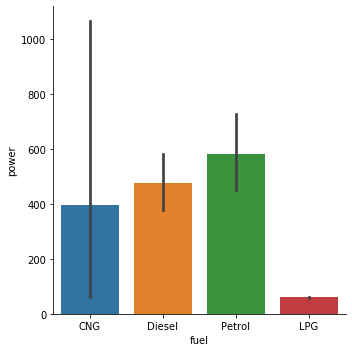

In [174]:
a=sns.catplot(x="fuel", y="price", kind="bar", data=df)
b=sns.catplot(x="fuel", y="mileage", kind="bar", data=df)
c=sns.catplot(x="fuel", y="engine", kind="bar", data=df)
d=sns.catplot(x="fuel", y="power", kind="bar", data=df)

**The above graph clearly states the fact that diesel cars are more preferred than petrol cars. Thus, price of used cars follows the order: diesel>petrol>CNG>LPG .<br> This might be because:<br>**
* Petrol and Diesel have high engine capacity.
* Though CNG and LPG gives higher mileage, they are not safer and require high maintenance. 
* Cost of petrol is high and diesel index is little complex and thus a little costlier than petrol engine.

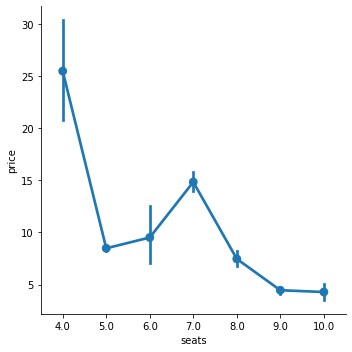

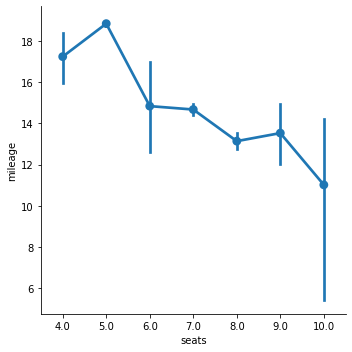

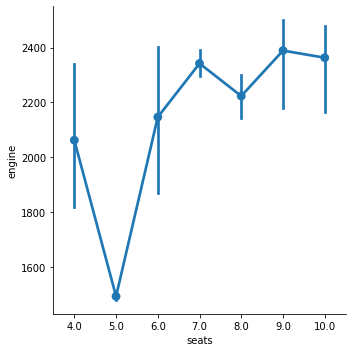

In [176]:
a=sns.catplot(x="seats", y="price", kind="point", data=df)
b=sns.catplot(x="seats", y="mileage", kind="point", data=df)
c=sns.catplot(x="seats", y="engine", kind="point", data=df)

In [175]:
df.seats.value_counts()

5.0     5012
7.0      674
8.0      134
4.0      116
6.0       31
10.0       5
9.0        3
Name: seats, dtype: int64

**The price of four seaters is higher than the rest. So, it seems that people prefer 4 seaters more, considering the average family size of Indian households.<br>**
- Also it can be analysed that greater the no. of seats of the car, greater the power of engine and lower the mileage of the car.

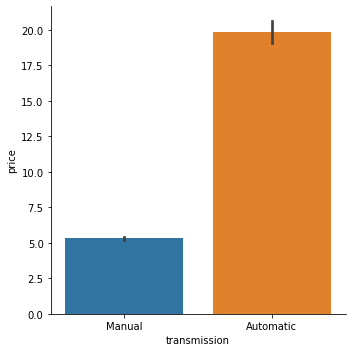

In [177]:
sns.catplot(x="transmission", y="price", kind="bar", data=df)

**Price of automated transmission is higher than manual, again for obvious reasons**

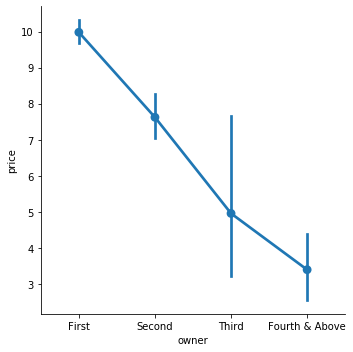

In [178]:
a=sns.catplot(x="owner", y="price", kind="point", data=df,order=['First','Second','Third','Fourth & Above'])
a

**So, lower the no. of times the car has been bought, higher the praise, as implied**<br> 

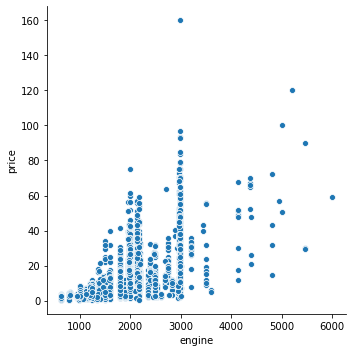

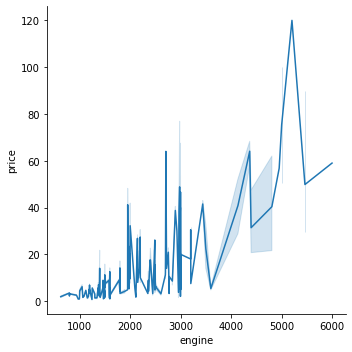

In [179]:
sns.relplot(x='engine',y='price',data=df,kind='scatter')
sns.relplot(x='engine',y='price',data=df,kind='line')

**The dots are not perfectly forming a pattern, but more or less, it seems more the capacity of the engine, more price of the car.**

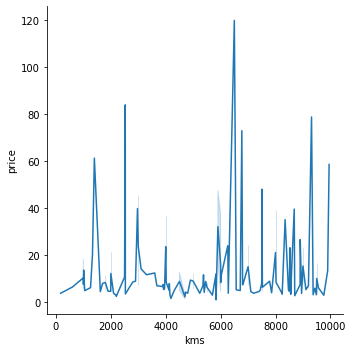

In [181]:
a=df.loc[df.kms<10000]
sns.relplot(x='kms',y='price',data=a, kind='line')

This kms travelled by the car hadn't affected the price of the car in a pattern. 

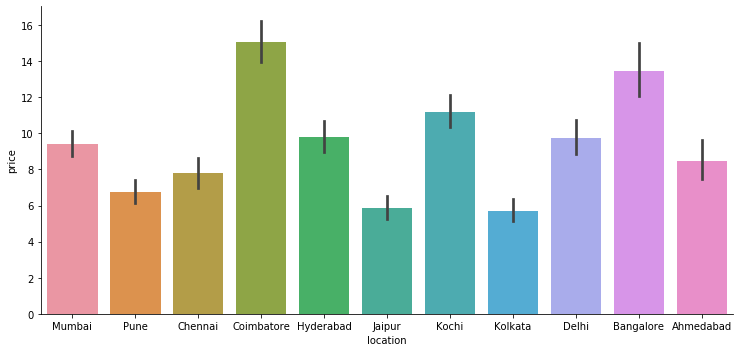

In [184]:
a=sns.catplot(x="location", y="price", kind="bar", data=df)
a.fig.set_figwidth(12)
a.fig.set_figheight(5)


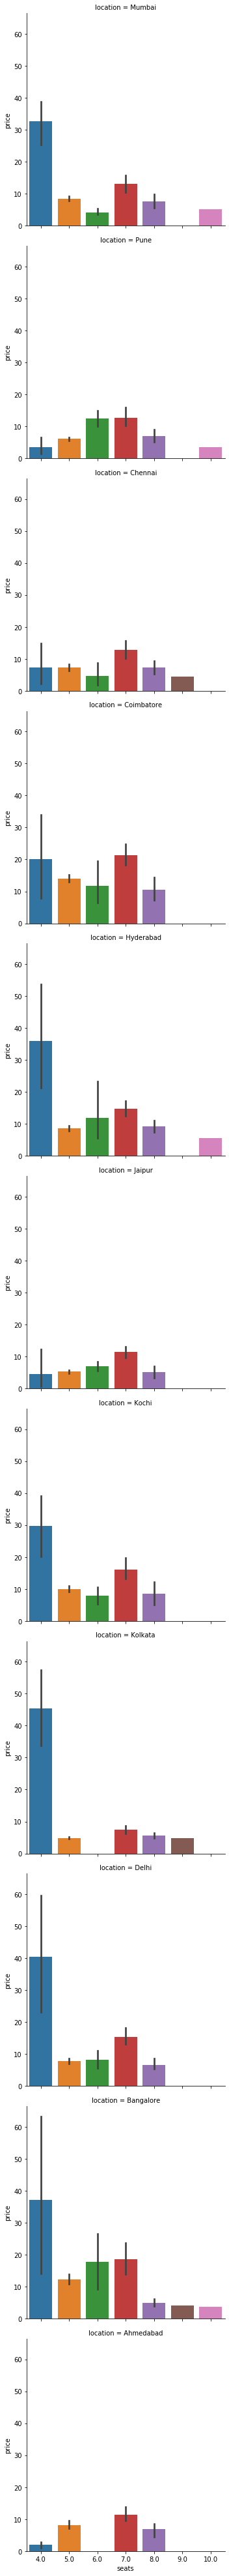

In [194]:
a=sns.catplot(x="seats", y="price", kind="bar",row='location', data=df)

**The preference of the cars seems to vary from city to city. Also in cities like Coimbatore, Bangalore, 7 seaters are preferred and seven seaters are sure a bit costlier**